In [35]:
# Modules used for data handling.
import pandas as pd
import numpy as np
from numpy import expand_dims

# Modules used for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Module used to perform random choice from an iterable.
import random as r

# Modules used to build the MLP architecture
import keras
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation, MaxPooling2D, Conv2D, UpSampling2D, Input
from keras.datasets import mnist

sns.set_style()

In [9]:
class Dataset:
    
    def __init__(self):
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None

    def load_dataset(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()
    
    def show_samples(self):
        rows = 3
        columns = 8
        fig, axs = plt.subplots(rows, columns,figsize=(8,8))
        for i in range(rows):
            for j in range(columns):
                axs[i,j].imshow(r.choice(self.x_train),cmap='gray')
        fig.suptitle("Image Samples of MNIST dataset")
        plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0)
        plt.show()

In [10]:
d = Dataset()

In [11]:
d.load_dataset()

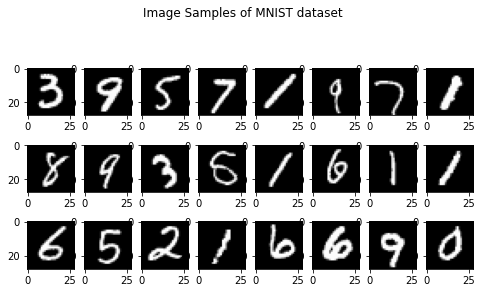

In [12]:
d.show_samples()

In [49]:
class Autoencoder:

    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_test = y_test
        self.y_train = y_train
        self.x_test = x_test
        self.IMG_DIM = (28,28,1)
        self.x = None

    def design_encoder(self):
        self.input = Input(shape=(28, 28, 1))  
        self.x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(self.input)
        self.x = MaxPooling2D(pool_size = (2, 2), padding='same')(self.x)

        self.x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(self.x)
        self.x = MaxPooling2D(pool_size = (2, 2), padding='same')(self.x) 

        self.x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(self.x)
        self.encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(self.x)
    
    def design_decoder(self):
        self.x = Conv2D(8, (3, 3), activation='relu', padding='same')(self.encoded)
        self.x = UpSampling2D((2, 2))(self.x)

        self.x = Conv2D(8, (3, 3), activation='relu', padding='same')(self.x)
        self.x = UpSampling2D((2, 2))(self.x)

        self.x = Conv2D(16, (3, 3), activation='relu')(self.x)
        self.x = UpSampling2D((2, 2))(self.x)
        self.decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(self.x)
    
    def compile_model(self):
        self.model = keras.models.Model(self.input, self.decoded)
        self.model.compile(optimizer='adadelta', loss='binary_crossentropy')
    
    def fit_model(self):
        self.model.fit(self.x_train, self.x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(self.x_test, self.x_test)
        )


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                # callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
               )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 136s 2ms/step - loss: 0.2157 - val_loss: 0.1640
Epoch 2/50
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1535 - val_loss: 0.1422
Epoch 3/50
60000/60000 [==============================] - 126s 2ms/step - loss: 0.1394 - val_loss: 0.1371
Epoch 4/50
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1320 - val_loss: 0.1258
Epoch 5/50
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1274 - val_loss: 0.1291
Epoch 6/50
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1238 - val_loss: 0.1209
Epoch 7/50
60000/60000 [==============================] - 123s 2ms/step - loss: 0.1211 - val_loss: 0.1156
Epoch 8/50
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1190 - val_loss: 0.1176
Epoch 9/50
60000/60000 [==============================

In [50]:
a = Autoencoder(d.x_train, d.y_train, d.x_test, d.y_test)

In [51]:
a.design_encoder()

In [52]:
a.design_decoder()

In [53]:
a.compile_model()

In [54]:
a.fit_model()

Epoch 1/10
469/469 [==============================] - 69s 143ms/step - loss: -121.0188 - val_loss: -241.1929
Epoch 2/10
469/469 [==============================] - 68s 144ms/step - loss: -379.3386 - val_loss: -477.7605
Epoch 3/10
469/469 [==============================] - 64s 136ms/step - loss: -483.9781 - val_loss: -498.0706
Epoch 4/10
469/469 [==============================] - 68s 145ms/step - loss: -492.1969 - val_loss: -500.3997
Epoch 5/10
469/469 [==============================] - 62s 132ms/step - loss: -493.3473 - val_loss: -500.7228
Epoch 6/10
469/469 [==============================] - 61s 131ms/step - loss: -493.5457 - val_loss: -500.8439
Epoch 7/10
469/469 [==============================] - 61s 131ms/step - loss: -493.7238 - val_loss: -501.0858
Epoch 8/10
469/469 [==============================] - 56s 119ms/step - loss: -494.0466 - val_loss: -501.4864
Epoch 9/10
469/469 [==============================] - 57s 122ms/step - loss: -494.4566 - val_loss: -501.8907
Epoch 10/10
469/469

313/313 [==============================] - 5s 16ms/step


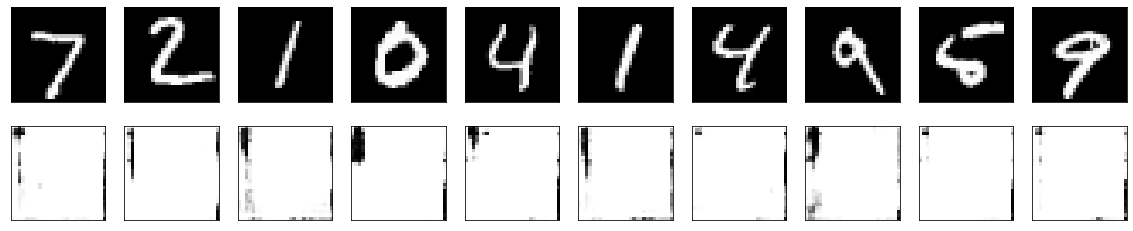

In [56]:
decoded_imgs = a.model.predict(a.x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(a.x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()